In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, BatchNormalization, MultiHeadAttention, LayerNormalization, Flatten, TimeDistributed
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns

In [ ]:
# Load datasets
train_file_path = '/content/drive/MyDrive/project-3/data/mitbih_train.csv'
test_file_path = '/content/drive/MyDrive/project-3/data/mitbih_test.csv'

# Load dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

train_data = load_data(train_file_path)
test_data = load_data(test_file_path)

In [ ]:
# Separate features and labels
X_train_raw = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test_raw = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

In [ ]:
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [ ]:
# Apply Savitzky-Golay filtering for signal smoothing
def preprocess_data(X):
    smoothed_X = np.array([savgol_filter(signal, window_length=5, polyorder=2) if len(signal) >= 5 else signal for signal in X])
    return smoothed_X

X_train_smoothed = preprocess_data(X_train_raw)
X_test_smoothed = preprocess_data(X_test_raw)

# Standardize the data
scaler = StandardScaler()
X_train_standardized = X_train_standardized.reshape(X_train_standardized.shape[0], X_train_standardized.shape[1], 1)
X_test_standardized = X_test_standardized.reshape(X_test_standardized.shape[0], X_test_standardized.shape[1], 1)

NameError: name 'X_train_standardized' is not defined

In [ ]:
# Define Transformer model for multi-class classification
def create_transformer_model(input_shape, num_classes, num_heads=4, key_dim=64, num_layers=3):
    inputs = Input(shape=(input_shape[0], input_shape[1]))
    x = TimeDistributed(Dense(64, activation='relu'))(inputs)

    for _ in range(num_layers):
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
        x = LayerNormalization(epsilon=1e-6)(x + attn_output)
        feed_forward = Dense(64, activation='relu')(x)
        x = LayerNormalization(epsilon=1e-6)(x + feed_forward)

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
num_classes = 5
model = create_transformer_model(input_shape=X_train_standardized.shape[1:], num_classes=num_classes)
model.summary()

NameError: name 'create_transformer_model' is not defined

In [ ]:
# Train the model
history = model.fit(
    X_train_standardized, y_train,
    validation_data=(X_test_standardized, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
    ]
)

NameError: name 'model' is not defined

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_standardized, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9951 - loss: 0.0234
Test Accuracy: 0.98


In [ ]:
# Generate predictions
y_pred = np.argmax(model.predict(X_test_standardized), axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(5)]))

685/685 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18117
           1       0.95      0.65      0.77       556
           2       0.97      0.92      0.94      1448
           3       0.85      0.71      0.77       162
           4       0.99      0.98      0.98      1608

    accuracy                           0.98     21891
   macro avg       0.95      0.85      0.89     21891
weighted avg       0.98      0.98      0.98     21891



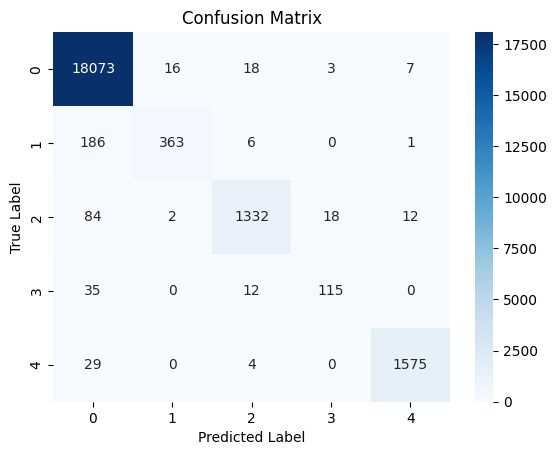

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot training and validation metrics
plt.figure(figsize=(16, 6))

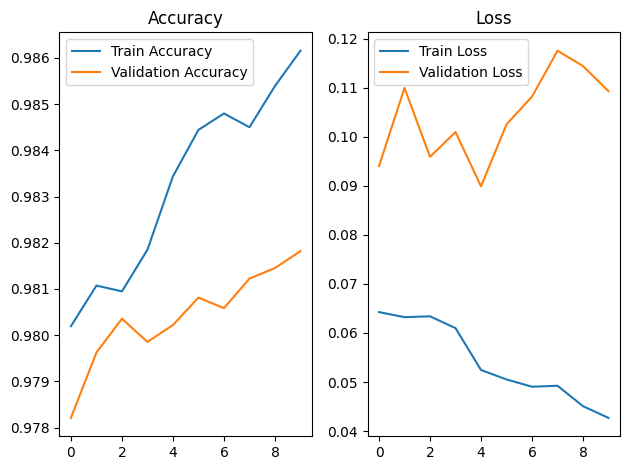

In [ ]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/ecg_transformer_multiclass_model.h5')

NameError: name 'model' is not defined